In [1]:
#1. Create a Pandas DataFrame reading N rows of the data/data_000637.txt
import pandas as pd
import numpy as np

data = pd.read_csv('data/data_000637.txt', skiprows=0, nrows= 15000)
print(data)
print(data.info())
#The header is : INDEX  HEAD    TDC_CHANNEL ORBIT_CNT   BX_COUNTER  TDC_MEAS


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
14995     1     1            4  3869200316        3399         9
14996     1     1           17  3869200316        3400        15
14997     1     1           10  3869200316        3530        16
14998     1     1            8  3869200316        3533        18
14999     1     0          139  3869200316        3539         0

[15000 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   H

In [2]:
#2. Estimate the number of BX in a ORBIT (the value x)
bx=data['BX_COUNTER']
print('The BX_COUNTER column is: \n', bx, '\n')
max1=0
print(bx.shape)
for i in bx:
   if i > max1:
    max1 =i
estimated_bx= max1+1
print('Estimated number of BX in a ORBIT, solution1:', estimated_bx, '\n')


The BX_COUNTER column is: 
 0        2374
1        2374
2        2553
3        2558
4        2760
         ... 
14995    3399
14996    3400
14997    3530
14998    3533
14999    3539
Name: BX_COUNTER, Length: 15000, dtype: int64 

(15000,)
Estimated number of BX in a ORBIT, solution1: 3564 



In [3]:
#3. Create a new column with the absolute time in ns and convert the new column to a Time Series
import datetime as dt
data['Time'] = data['TDC_MEAS'] * (25/30) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT'] * estimated_bx * 25
data['Time'] = pd.to_datetime(data['Time']) #???????
print(data, '\n')


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
14995     1     1            4  3869200316        3399         9   
14996     1     1           17  3869200316        3400        15   
14997     1     1           10  3869200316        3530        16   
14998     1     1            8  3869200316        3533        18   
14999     1     0          139  3869200316        3539         0   

                               Time  
0     1970-01-04 23:45:45.734939071  
1     1970-01-04 23:45:45.734939072  
2     1970-01-04 23:45:45.734943548  
3     1970-01-04 23:45:45.73494

In [6]:
#4. Find out the duration of the data
startTime= dt.datetime.now()
data['Time'] = data['TDC_MEAS'] * (25/30) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT'] * estimated_bx * 25
endTime= dt.datetime.now()
durationTime= endTime - startTime
print('DurationTime: ', durationTime, '\n')

gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.arange(8),
                    'D' : np.linspace(10, -10, 8)})
print(gdf)

DurationTime:  0:00:00.005162 

     A      B  C          D
0  foo    one  0  10.000000
1  bar    one  1   7.142857
2  foo    two  2   4.285714
3  bar  three  3   1.428571
4  foo    two  4  -1.428571
5  bar    two  5  -4.285714
6  foo    one  6  -7.142857
7  foo  three  7 -10.000000


In [7]:
#5. Use the .groupby() method to find out the noisy channels
groupby_Channel= data.groupby('TDC_CHANNEL').sum().sort_values(by=['HEAD']).iloc[-3:]
print("3 noisy Channels: \n", groupby_Channel, '\n')


3 noisy Channels: 
              HEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS          Time
TDC_CHANNEL                                                               
63            749     6  2898030982000     1364359     11085  2.582146e+17
64            752    17  2909638583165     1394717     10889  2.592488e+17
139          1268   389  4906145905369     2247027         0  4.371376e+17 



In [8]:
#6. Count the number of non-empty orbits ????
nonemptyOrbit = data[data['ORBIT_CNT']>0].count()
print("count of non empty orbit: ", nonemptyOrbit['ORBIT_CNT'], '\n')


count of non empty orbit:  15000 



In [9]:
#7. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.
tdc = data[data['TDC_CHANNEL'] == 139]
#print(tdc)
noofunitOrbit= tdc['ORBIT_CNT'].nunique()
print("count of unique orbit: ", noofunitOrbit, '\n')

count of unique orbit:  150 



In [10]:
#8. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.
FPGA0= data[data['FPGA']==0]
FPGA1= data[data['FPGA']==1]
FPGA0_TDC_Count = FPGA0['TDC_CHANNEL'].value_counts()
FPGA1_TDC_Count = FPGA1['TDC_CHANNEL'].value_counts()
print('FPGA 0 TDC_CHANNEL count: \n', FPGA0_TDC_Count)
print('FPGA 1 TDC_CHANNEL count: \n', FPGA1_TDC_Count)

FPGA 0 TDC_CHANNEL count: 
 139    879
63     743
64     735
61     555
62     529
      ... 
99       5
107      5
98       5
106      4
101      3
Name: TDC_CHANNEL, Length: 117, dtype: int64
FPGA 1 TDC_CHANNEL count: 
 139    389
2      363
1      338
4      290
3      277
      ... 
91       1
78       1
93       1
75       1
76       1
Name: TDC_CHANNEL, Length: 124, dtype: int64


<AxesSubplot:title={'center':'FPGA 0'}, xlabel='TDC_CHANNEL'>

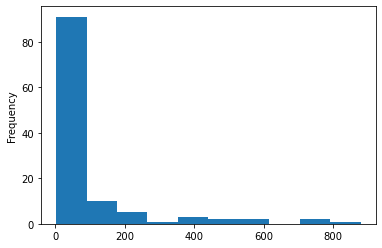

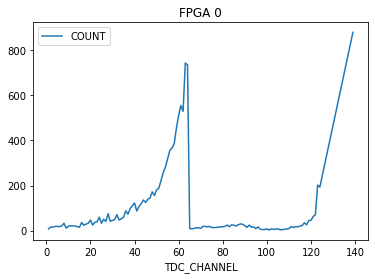

In [11]:
#9. Create two histograms that show the number of counts for each TDC channel
ax = FPGA0_TDC_Count.plot.hist()
fpga_0 = data[data['FPGA']== 0].groupby('TDC_CHANNEL').size().reset_index(name='COUNT')
fpga_0.plot(x = 'TDC_CHANNEL', y = 'COUNT', title = "FPGA 0")

